In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_excel('COVID_ 03132020.xlsx')

In [2]:
df = df.drop(columns=['summary','source','link'])

In [3]:
df = df.dropna(subset=['death'])

In [4]:
death = df['death'].to_numpy()
count = 0
for i in death:
    if(death[count]!=0  and death[count]!=1):
        df = df[df.death != death[count]]
    count = count + 1

In [5]:
df = df.drop(columns=['reporting date','id','symptom_onset','If_onset_approximated','hosp_visit_date','international_traveler'])
df = df.drop(columns = ['domestic_traveler','exposure_start','exposure_end','traveler','symptom'])

In [6]:
df['location'] = df['location'].fillna(method="bfill")
df['gender'] = df['gender'].fillna(method="bfill")

In [7]:
#age 
age = df['age'].values
age = np.reshape(age,(-1,1))
most_frequent = df['age'].mode()
count= 0

for i in age:
    if( i[0] >= 1 ):
        age[count][0] = int(i[0])
    elif( i[0] <= 0):
        age[count][0] = most_frequent
    count = count+1
        
imp = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
imp.fit(age)
df['age'] = imp.transform(age)

In [8]:
#case_in_country
case_in_country = df['case_in_country'].values
case_in_country = np.reshape(case_in_country,(-1,1))
most_frequent = df['case_in_country'].mode()
count = 0

for i in case_in_country:
    if( i[0] >= 0 ):
        case_in_country[count][0] = int(i[0])
    elif( i[0] < 0 ):
        case_in_country[count][0] = most_frequent
    count = count+1

imp = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
imp.fit(case_in_country)
df['case_in_country'] = imp.transform(case_in_country)

In [9]:
#visiting_Wuhan
visiting_Wuhan = df['visiting Wuhan'].values
visiting_Wuhan = np.reshape(visiting_Wuhan,(-1,1))
most_frequent = df['visiting Wuhan'].mode()
count = 0

for i in visiting_Wuhan:
    if(i[0]!=0 and i[0]!=1):
        visiting_Wuhan[count][0] = most_frequent
    count = count+1

In [10]:
#from Wuhan
from_Wuhan = df['from Wuhan'].values
from_Wuhan = np.reshape(from_Wuhan,(-1,1))
most_frequent = df['from Wuhan'].mode()
count = 0

for i in from_Wuhan:
    if(i[0]!=0 and i[0]!=1):
        from_Wuhan[count][0] = most_frequent
    count = count+1

In [11]:
death = df['death'].to_numpy()
recovered = df['recovered'].to_numpy()
count = 0

for i in death:
    if( (death[count]==0  or death[count]==1) and (recovered[count]!=0 and recovered[count]!=1)):
        if(death[count]==0):
            recovered[count] = 0
        else:
            recovered[count] = 0
    count = count+1

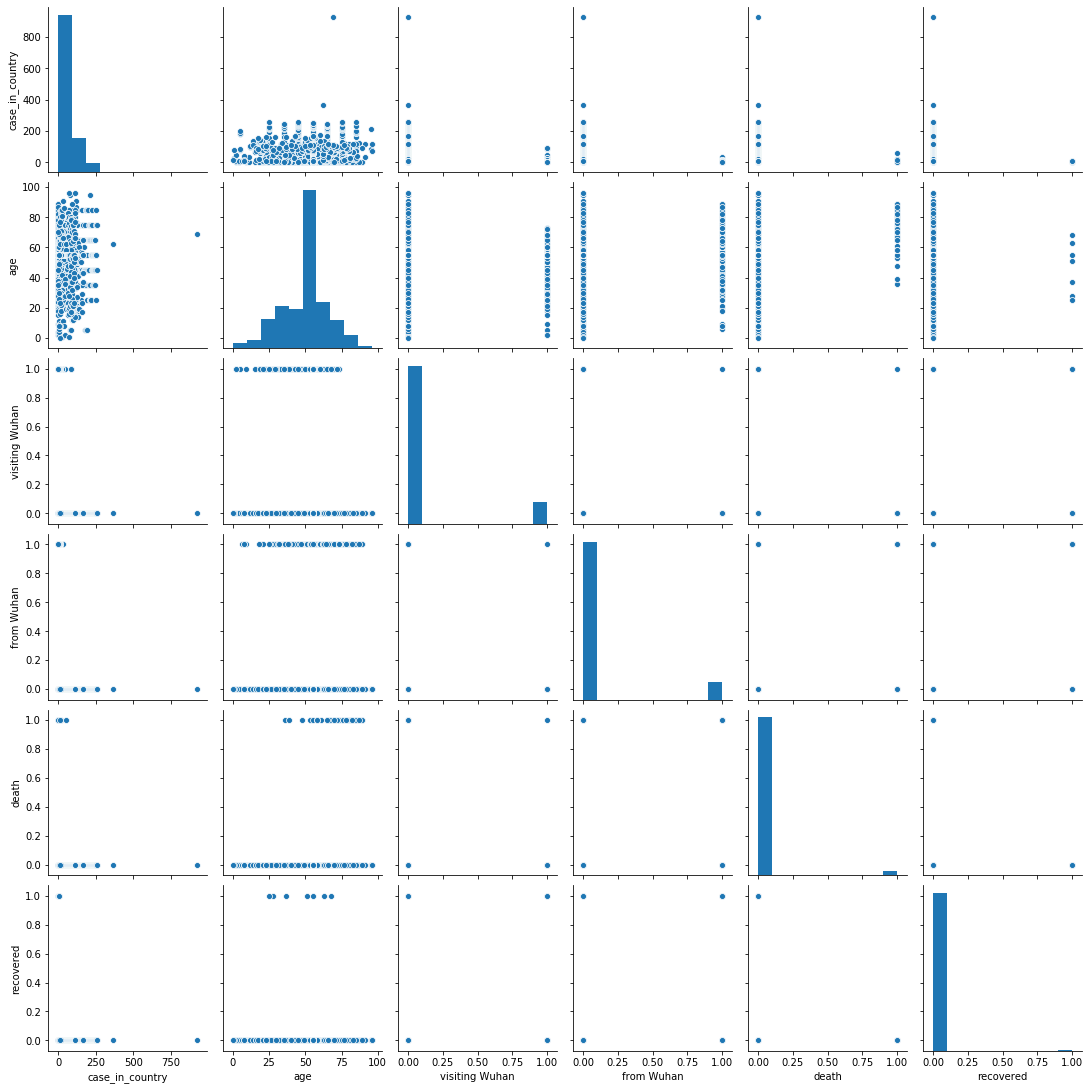

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [13]:
df['death']=df['death'].astype('int64')
df['recovered']=df['recovered'].astype('int64')
df.corr()

,case_in_country,age,visiting Wuhan,from Wuhan,death,recovered
case_in_country,1.000000,0.091240,-0.302311,-0.279165,-0.143868,-0.058230
age,0.091240,1.000000,-0.135849,0.025493,0.199564,-0.017237
visiting Wuhan,-0.302311,-0.135849,1.000000,-0.116243,-0.049711,0.062397
from Wuhan,-0.279165,0.025493,-0.116243,1.000000,0.370163,0.106581
death,-0.143868,0.199564,-0.049711,0.370163,1.000000,-0.011038
recovered,-0.058230,-0.017237,0.062397,0.106581,-0.011038,1.000000


In [14]:
df = pd.concat([df,pd.get_dummies(df['gender'],prefix='gender')],axis=1)
df = pd.concat([df,pd.get_dummies(df['country'],prefix='country')],axis=1)
df = pd.concat([df,pd.get_dummies(df['location'],prefix='location')],axis=1)

In [15]:
df = df.drop(columns=['gender','country','location'])

In [16]:
X = df.drop(columns=['death'])
X = X.astype('int64')

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,case_in_country,age,visiting Wuhan,from Wuhan,recovered,gender_female,gender_male,country_Afghanistan,country_Algeria,country_Australia,...,location_Xinjiang,location_Yau Ma Tei,location_York,location_Yunnan,location_Yunnan,location_Zabaikalsky,location_Zaragoza,location_Zhejiang,location_Zhuhai,location_Zurich
0,-0.902259,0.948946,2.678837,-0.328856,-0.066751,-0.862349,0.862349,-0.025182,-0.025182,-0.097964,...,-0.043644,-0.025182,-0.035624,-0.091141,-0.06178,-0.025182,-0.025182,-0.025182,-0.025182,-0.025182
1,-0.902259,0.323032,-0.373296,3.040847,-0.066751,1.159623,-1.159623,-0.025182,-0.025182,-0.097964,...,-0.043644,-0.025182,-0.035624,-0.091141,-0.06178,-0.025182,-0.025182,-0.025182,-0.025182,-0.025182
2,-0.902259,-0.302882,-0.373296,3.040847,-0.066751,-0.862349,0.862349,-0.025182,-0.025182,-0.097964,...,-0.043644,-0.025182,-0.035624,-0.091141,-0.06178,-0.025182,-0.025182,39.711459,-0.025182,-0.025182
3,-0.902259,0.573397,2.678837,-0.328856,-0.066751,1.159623,-1.159623,-0.025182,-0.025182,-0.097964,...,-0.043644,-0.025182,-0.035624,-0.091141,-0.06178,-0.025182,-0.025182,-0.025182,-0.025182,-0.025182
4,-0.902259,0.448215,-0.373296,-0.328856,-0.066751,-0.862349,0.862349,-0.025182,-0.025182,-0.097964,...,-0.043644,-0.025182,-0.035624,-0.091141,-0.06178,-0.025182,-0.025182,-0.025182,-0.025182,-0.025182


In [18]:
y = df['death']
y = y.astype('int64')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: death, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()

parameters = { 
    'criterion':["gini", "entropy"],
    'splitter':["best", "random"]
}
best_model = GridSearchCV(model,parameters,cv=5)
best_model.fit(X_train,y_train)
best_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [21]:
answer = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, answer)

0.9915611814345991